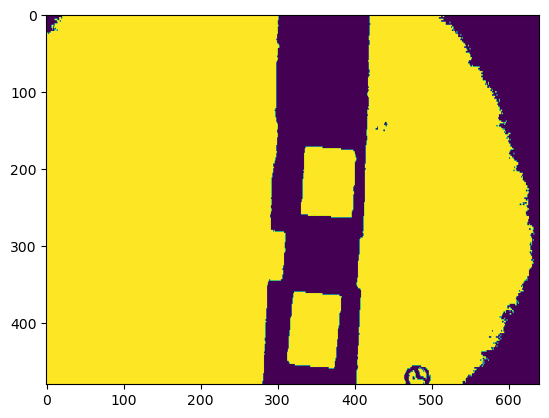

In [59]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

originalImage = cv2.imread('yellowtargets.png')
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_RGB2GRAY)
  
(thresh, binary_image) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)

#TODO verify why threshold don't return real binary image
for row in range(binary_image.shape[0]):
    for col in range(binary_image.shape[1]):
        if binary_image[row][col] > 127:
            binary_image[row][col] = 255
        else:
            binary_image[row][col] = 0

# plt.imshow(originalImage)
# plt.imshow(grayImage)
plt.imshow(binary_image)

h = binary_image.shape[0]
w = binary_image.shape[1]

[0, 0, 255, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[0, 0, 255, 0]
[1, 0, 0, 0]
[1, 0, 0, 0]
[2, 0, 0, 0]
[2, 0, 0, 0]
[2, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[0, 0, 3, 0]
[4, 0, 0, 0]
[4, 0, 0, 0]
[5, 0, 0, 0]
[5, 0, 0, 0]
[0, 0, 0, 255]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[255, 0, 0, 0]
[0, 255, 0, 0]
[255, 0, 0, 0]
[0, 0, 5, 0]
[0, 0, 1, 0]
[0, 0, 1, 0]
[0, 255, 0, 0]
[0, 0, 255, 0]
[6, 0, 0, 0]
[6, 0, 0, 0]
[6, 0, 0, 0]
[0, 0, 7, 0]
[8, 0, 0, 0]
[0, 0, 7, 0]
[0, 0, 7, 0]
[0, 0, 10, 0]
[0, 0, 0, 255]
[7, 0, 0, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[0, 0, 11, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[1, 0, 0, 0]
[7, 0, 0, 0]
[0, 0, 0, 255]
[0, 0, 12, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[0, 0, 13, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]
[0, 0, 0, 255]
[7, 0, 0, 0]
[0, 0, 14, 0]
[7, 0, 0, 0]
[7, 0, 0, 0]

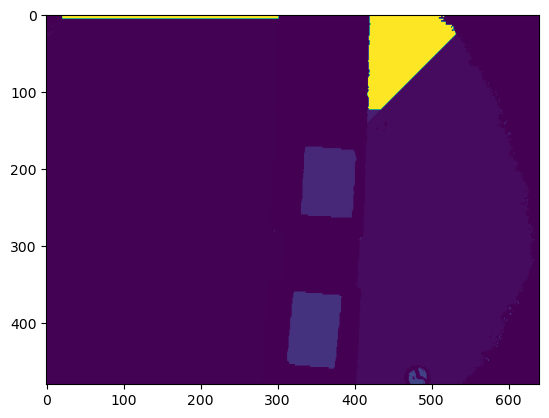

In [73]:
def connected_component(image):
    image = image.copy()
    tag = 1
    hashmap = {}
    # First pass
    for row in range(1, image.shape[0]):
        for col in range(1, image.shape[1]):
            if image[row][col] == 255:
                neighbours = [image[row, col-1], image[row-1][col-1], image[row-1][col], image[row-1][col+1]]
                
                if neighbours == [0,0,0,0]:
                    image[row][col] = tag
                    tag += 1

                elif neighbours.count(0) == 3:
                    image[row][col] = max(neighbours)

                else:
                    non_zero_neighbours = [i for i in neighbours if i != 0]
                    lowest = min(non_zero_neighbours)
                    image[row][col] = lowest

                    for temp_label in non_zero_neighbours:
                        if temp_label != 0 and temp_label != lowest:
                            if lowest in hashmap:
                                hashmap[lowest] = temp_label
                            else:
                                hashmap[lowest] = temp_label
    print(hashmap)

    # Second pass

    print('Number of tags: ', tag)
    return image
    
new_image = connected_component(binary_image)
plt.imshow(new_image)